<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson10_BayesLogReg_digitClassif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Naive Bayes, a linear classifier (a neural network with no hidden units and linear activation), 
#and now logistic regression are similar in that they all learn a one-weight-per-feature model. 
#How do they compare on the MNIST digit data from Lesson 4 on neural networks? 
#Which does the best job of combining evidence from across the image to make a classification? 
#Run the algorithms to find out.

In [ ]:
#Again, policy is not to run this but to re-evoke and run imports next to first 
#call that needs them, for learning purposes

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import random
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier



In [5]:
#explore some of these datasets later?
from sklearn.datasets import fetch_openml

#I guess function is for opening datasets from this source. What else can I open?
#faces & objects?
#If return_X_y is set to True, then fetch_openml returns data and targets (tuple)
#X is a 70,000*784 DataFrame and y is a 70,000 Series
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
#Next, we will divide the data into a training set and test set, 
#randomly selecting 5000 examples for training

train_samples = 5000
test_samples = 10000

#The permutation doesn't work unless X and y are converted from pandas to np array
#(lesson here forgot to do this but it was in Lesson 4 version of this code)
import numpy as np
X = np.array(X)
y = np.array(y)

#Get list of random numbers
from sklearn.utils import check_random_state

random_state = check_random_state(0)  #seed and configure
permutation = random_state.permutation(X.shape[0])  #produce list of numbers the shape of training set

#then permute
X = X[permutation]
y = y[permutation]

X = X.reshape((X.shape[0], -1))


NameError: ignored

In [8]:
#training/ test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=test_samples)

In [31]:
def getModelResults(clf,traindat,trainlabs,testdat,testlabs):

  clf.fit(traindat, trainlabs)
  score = clf.score(testdat, testlabs)
  pred_proba = clf.predict_proba(testdat)[:, 1]

  #from sklearn.metrics import roc_auc_score, roc_curve
  #fpr, tpr, _ = roc_curve(testlabs, pred_proba)
  #roc_auc = roc_auc_score(y_test, pred_proba)

  #Plot confusion matrix
  #colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
  from sklearn.metrics import ConfusionMatrixDisplay
  import matplotlib.pyplot as plt
  disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        testdat,
        testlabs,
        cmap=plt.cm.plasma,
   )
  
  plt.show()
  #print(disp)

  return score, pred_proba
 # return score, pred_proba, fpr, tpr, roc_auc

In [18]:
clf = MLPClassifier(hidden_layer_sizes=[], activation='identity', max_iter = 10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

pred_proba = clf.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


neural network:


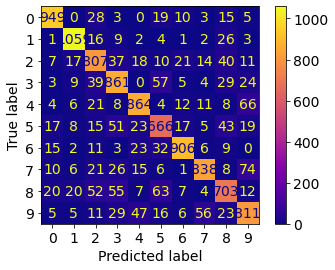

proportion correct 0.8464
logistic regression:


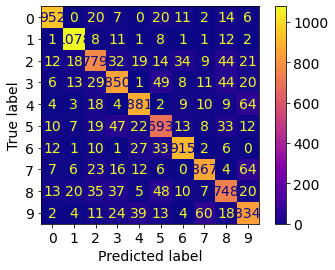

proportion correct 0.8597
Naive Bayes


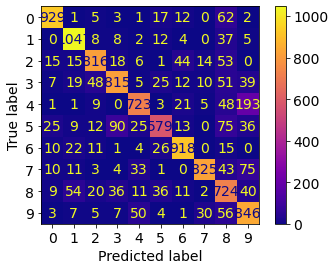

proportion correct 0.8222


In [32]:
#Run three one layer linear models and plot their confusions

#For ROC plot, so I can overlay the three models

#import matplotlib
#import matplotlib.pyplot as plt

#plt.figure(figsize=(8, 6))
#matplotlib.rcParams.update({'font.size': 14})
#plt.grid()

#linear neural network
print('neural network:')
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[], activation='identity', max_iter = 10000)
score, pred_proba = getModelResults(clf,X_train,y_train,X_test,y_test)
print('proportion correct',score)

#logistic regression
print('logistic regression:')
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000)
score, pred_proba = getModelResults(clf,X_train,y_train,X_test,y_test)
print('proportion correct',score)

#naive Bayes classifier
print('Naive Bayes')
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
score, pred_proba = getModelResults(clf,X_train,y_train,X_test,y_test)
print('proportion correct',score)